In [2]:
import sys 
sys.path.append('..')
from dotenv import load_dotenv
import os
load_dotenv()

TEST_DUMMY_API_KEY = os.getenv('TEST_DUMMY_API_KEY_DEV')
TEST_DUMMY_API_URL = os.getenv('TEST_DUMMY_API_URL_DEV')

from krixik import krixik
krixik.init(api_key = TEST_DUMMY_API_KEY, 
            api_url = TEST_DUMMY_API_URL)

import json
def json_print(data):
    print(json.dumps(data, indent=2))
    
# define directory for input files 
input_directory = 'input_files/'

# define directory for output files
output_directory = 'output_files/'

# define directory for pipeline_configs
pipeline_configs_directory = 'pipeline_configs/'

%load_ext autoreload
%autoreload 2 

SUCCESS: You are now authenticated.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.  Caption modular pipelines

Just start with a caption module pipeline.

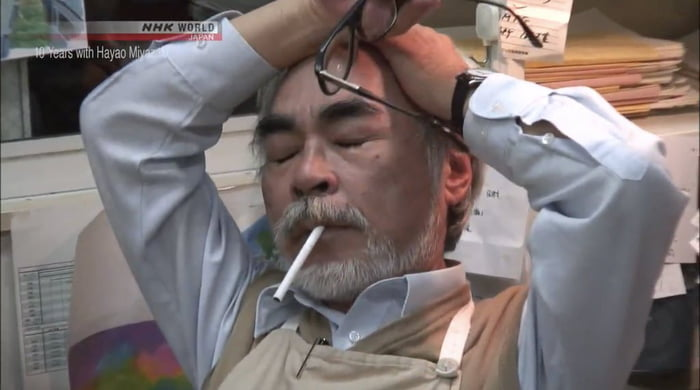

In [24]:
test_file = input_directory + "techlife.jpg"

from IPython.display import Image
Image(filename=test_file) 

In [27]:
from krixik.pipeline_builder.module import Module
from krixik.pipeline_builder.pipeline import CreatePipeline

# choose module(s)
module_1 = Module(name="caption")

# create custom pipeline
custom = CreatePipeline(name='simple-caption-pipeline', 
                        module_chain=[module_1])

# pass the custom object to the krixik operator (note you can also do this by passing its config - we'll do below)
pipeline = krixik.load_pipeline(pipeline=custom)

# process
output = pipeline.process(local_file_path = test_file,
                          expire_time=60*3)

INFO: hydrated input modules: {'caption': {'model': 'vit-gpt2-image-captioning', 'params': {}}}
INFO: symbolic_directory_path was not set by user - setting to default of /etc
INFO: file_name was not set by user - setting to random file name: krixik_generated_uyxamcqijr.jpg
INFO: wait_for_process is set to True.
INFO: file will expire and be removed from you account in 180 seconds, at Thu Apr 18 10:51:25 2024 UTC
INFO: simple-caption-pipeline file process and input processing started...
INFO: metadata can be updated using the .update api.
INFO: This file's process_id is: 73d645c7-3b99-afc6-6e9c-2d550e51c776
INFO: File process and processing status:
SUCCESS: module 1 (of 1) - caption processing complete.
SUCCESS: pipeline process complete.
SUCCESS: process output downloaded


In [28]:
output

{'status_code': 200,
 'pipeline': 'simple-caption-pipeline',
 'request_id': '4dcda1f9-ac9d-43eb-b4cd-0ed38b35e3e0',
 'file_id': '01e5d115-e5a4-4c86-97ea-bd3012ef0ecd',
 'message': 'SUCCESS - output fetched for file_id 01e5d115-e5a4-4c86-97ea-bd3012ef0ecd.Output saved to location(s) listed in process_output_files.',
 'warnings': [],
 'process_output': [{'caption': "a man with a beard cutting a man's hair"}],
 'process_output_files': ['/Users/jeremywatt/Desktop/krixik/krixik_cli/demo_examples/01e5d115-e5a4-4c86-97ea-bd3012ef0ecd.json']}

{'pipeline': {'name': 'simple-caption-pipeline',
  'modules': [{'name': 'caption',
    'models': [{'name': 'vit-gpt2-image-captioning'},
     {'name': 'git-base'},
     {'name': 'blip-image-captioning-base'},
     {'name': 'blip-image-captioning-large'}],
    'defaults': {'model': 'vit-gpt2-image-captioning'},
    'input': {'type': 'image',
     'permitted_extensions': ['.jpg', '.jpeg', '.png']},
    'output': {'type': 'json'}}]}}

# 2.  Caption to keyword search

In [2]:
from krixik.pipeline_builder.module import Module
from krixik.pipeline_builder.pipeline import CreatePipeline

# create a few modules
module_1 = Module(name="caption")
module_2 = Module(name="json-to-txt")
module_3 = Module(name="keyword-search")

pipeline = CreatePipeline(name='caption-pipeline-2', 
                               module_chain=[module_1, module_2, module_3])
pipeline.save('pipeline_configs/caption-pipeline-2.yaml')

In [3]:
my_pipeline = krixik.load_pipeline(config_path="pipeline_configs/caption-pipeline-2.yaml")
test_file = "data/resturant.png"

output = my_pipeline.process(local_file_path = test_file,
                             expire_time=180,
                             modules={})  # purposefully placing modules={}, they are filled in as necessary, not needed 

INFO: hydrated input modules: {'caption': {'model': 'vit-gpt2-image-captioning', 'params': {}}, 'json-to-txt': {'model': 'base', 'params': {}}, 'keyword-search': {'model': 'base', 'params': {}}}
INFO: symbolic_directory_path was not set by user - setting to default of /etc
INFO: file_name was not set by user - setting to random file name: krixik_generated_asboyxcvgv.png
INFO: wait_for_process is set to True.
INFO: file will expire and be removed from you account in 180 seconds, at Tue Apr  9 15:56:16 2024 UTC


INFO: caption-pipeline-2 file process and input processing started...
INFO: metadata can be updated using the .update api.
INFO: This file's process_id is: 6faf0c1f-465e-4e06-9d75-4788722aa9d3
INFO: File process and processing status:
SUCCESS: module 1 (of 3) - caption processing complete.
SUCCESS: module 2 (of 3) - json-to-txt processing complete.
SUCCESS: module 3 (of 3) - keyword-search processing complete.
SUCCESS: pipeline process complete.
SUCCESS: process output downloaded


In [4]:
output = my_pipeline.keyword_search(query="restaurant people", 
                                    symbolic_directory_paths=['/*'])

json_print(output)

{
  "status_code": 200,
  "request_id": "2fbb750f-3669-43c5-8b80-9af1a86352b4",
  "message": "Successfully queried 1 user file.",
  "warnings": [],
  "items": [
    {
      "file_id": "c8155d88-9796-496d-b89c-2feb8cdd92a9",
      "file_metadata": {
        "file_name": "krixik_generated_asboyxcvgv.png",
        "symbolic_directory_path": "/etc",
        "file_tags": [],
        "num_lines": 1,
        "created_at": "2024-04-09 22:53:18",
        "last_updated": "2024-04-09 22:53:18"
      },
      "search_results": [
        {
          "keyword": "people",
          "line_number": 1,
          "keyword_number": 5
        },
        {
          "keyword": "restaurant",
          "line_number": 1,
          "keyword_number": 9
        }
      ]
    }
  ]
}
